In [6]:
import os, shutil

original_dataset_dir = '/home/nick/Documents/Neural_Networks/Tutorials/Dogs_vs_Cats/original_data'

base_dir = '/home/nick/Documents/Neural_Networks/Tutorials/Dogs_vs_Cats/small_data'

train_dir = os.path.join(base_dir, 'training')
os.mkdir(train_dir)
val_dir = os.path.join(base_dir, 'validation')
os.mkdir(val_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)
val_cats_dir = os.path.join(val_dir, 'cats')
os.mkdir(val_cats_dir)
val_dogs_dir = os.path.join(val_dir, 'dogs')
os.mkdir(val_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(f'{original_dataset_dir}/train/', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(f'{original_dataset_dir}/train/', fname)
    dst = os.path.join(val_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(f'{original_dataset_dir}/train/', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(f'{original_dataset_dir}/train/', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(f'{original_dataset_dir}/train/', fname)
    dst = os.path.join(val_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(f'{original_dataset_dir}/train/', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
len(os.listdir(val_dogs_dir))

500

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)      

In [22]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [24]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 28s 283ms/step - loss: 0.7821 - acc: 0.5145 - val_loss: 0.6963 - val_acc: 0.5260
Epoch 2/30
100/100 [==============================] - 27s 270ms/step - loss: 0.6908 - acc: 0.5760 - val_loss: 0.6203 - val_acc: 0.6590
Epoch 3/30
100/100 [==============================] - 27s 270ms/step - loss: 0.6254 - acc: 0.6575 - val_loss: 0.7818 - val_acc: 0.6400
Epoch 4/30
100/100 [==============================] - 27s 272ms/step - loss: 0.5882 - acc: 0.6895 - val_loss: 0.4333 - val_acc: 0.6700
Epoch 5/30
100/100 [==============================] - 27s 272ms/step - loss: 0.5306 - acc: 0.7355 - val_loss: 0.5702 - val_acc: 0.7110
Epoch 6/30
100/100 [==============================] - 27s 271ms/step - loss: 0.5017 - acc: 0.7645 - val_loss: 0.5009 - val_acc: 0.6960
Epoch 7/30
100/100 [==============================] - 27s 272ms/step - loss: 0.4366 - acc: 0.7965 - val_loss: 1.0997 - val_acc: 0.6850
Epoch 8/30
100/100 [==============================] - 2

In [31]:
os.mkdir('/home/nick/Documents/Neural_Networks/Tutorials/Dogs_vs_Cats/models')
model.save('/home/nick/Documents/Neural_Networks/Tutorials/Dogs_vs_Cats/rmsprop.h5')

In [32]:
from keras import optimizers

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')])

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    epochs=30,
    steps_per_epoch=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 27s 273ms/step - loss: 0.6886 - acc: 0.5205 - val_loss: 0.6761 - val_acc: 0.6240
Epoch 2/30
100/100 [==============================] - 27s 272ms/step - loss: 0.6520 - acc: 0.6275 - val_loss: 0.6496 - val_acc: 0.6240
Epoch 3/30
100/100 [==============================] - 27s 273ms/step - loss: 0.6148 - acc: 0.6645 - val_loss: 0.7531 - val_acc: 0.6760
Epoch 4/30
100/100 [==============================] - 27s 274ms/step - loss: 0.5767 - acc: 0.6935 - val_loss: 0.6688 - val_acc: 0.6230
Epoch 5/30
100/100 [==============================] - 27s 274ms/step - loss: 0.5390 - acc: 0.7310 - val_loss: 0.4227 - val_acc: 0.6900
Epoch 6/30
100/100 [==============================] - 27s 273ms/step - loss: 0.5169 - acc: 0.7405 - val_loss: 0.5257 - val_acc: 0.7000
Epoch 7/30
100/100 [==============================] - 28s 275ms/step - loss: 0.4949 - acc: 0.7575 - val_loss: 0.5930 - val_acc: 0.6950
Epoch 8/30
100/100 [==============================] - 2

In [33]:
model.save('/home/nick/Documents/Neural_Networks/Tutorials/Dogs_vs_Cats/models/rmsprop_lr_1e-4.h5')

In [34]:
import matplotlib.pyplot as plt

acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Training and Validation Accuracy under LR=1e-4')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss under LR=1e-4')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [38]:
from keras import models

In [41]:
model_no_lr = models.load_model('/home/nick/Documents/Neural_Networks/Tutorials/Dogs_vs_Cats/models/rmsprop.h5')
lr = model.predict_generator(validation_generator, steps_per_epoch=50, epochs=50)
no_lr = model_no_lr.predict_generator(validation_generator, steps_per_epoch=50, epochs=50)

TypeError: predict_generator() got an unexpected keyword argument 'steps_per_epoch'

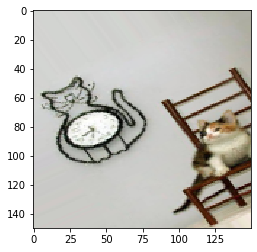

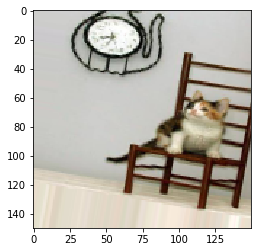

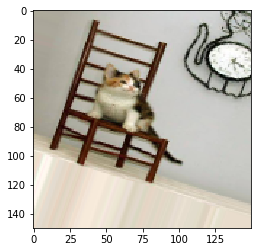

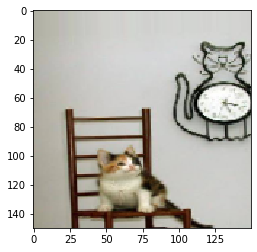

In [46]:
from keras.preprocessing import image

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[7]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [51]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/home/nick/Documents/Neural_Networks/Tutorials/Dogs_vs_Cats/small_data'
train_dir = os.path.join(base_dir, 'training')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode = 'binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            print('Convolutional base processing complete')
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(val_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

Found 2000 images belonging to 2 classes.
Convolutional base processing complete
Found 1000 images belonging to 2 classes.
Convolutional base processing complete
Found 1000 images belonging to 2 classes.
Convolutional base processing complete


In [57]:
from keras.layers import Dropout

model = Sequential([
    Dense(256, activation='relu', input_dim=4 * 4 * 512),
    Dropout(0.5),
    Dense(1, activation='sigmoid')])

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

pretrained_history = model.fit(
    train_features,
    train_labels,
    epochs=30,
    batch_size=20,
    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 623us/step - loss: 0.6121 - acc: 0.6605 - val_loss: 0.4453 - val_acc: 0.8270
Epoch 2/30
2000/2000 [==============================] - 1s 543us/step - loss: 0.4354 - acc: 0.7975 - val_loss: 0.3619 - val_acc: 0.8580
Epoch 3/30
2000/2000 [==============================] - 1s 533us/step - loss: 0.3551 - acc: 0.8525 - val_loss: 0.3202 - val_acc: 0.8780
Epoch 4/30
2000/2000 [==============================] - 1s 533us/step - loss: 0.3216 - acc: 0.8605 - val_loss: 0.2982 - val_acc: 0.8870
Epoch 5/30
2000/2000 [==============================] - 1s 541us/step - loss: 0.2833 - acc: 0.8890 - val_loss: 0.2806 - val_acc: 0.8930
Epoch 6/30
2000/2000 [==============================] - 1s 536us/step - loss: 0.2622 - acc: 0.8935 - val_loss: 0.2703 - val_acc: 0.8900
Epoch 7/30
2000/2000 [==============================] - 1s 553us/step - loss: 0.2444 - acc: 0.9030 - val_loss: 0.2851 - val_acc: 0.8750


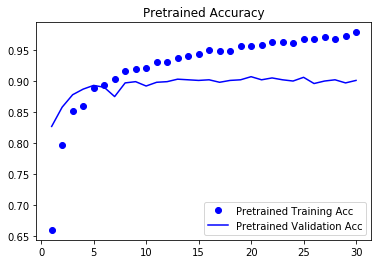

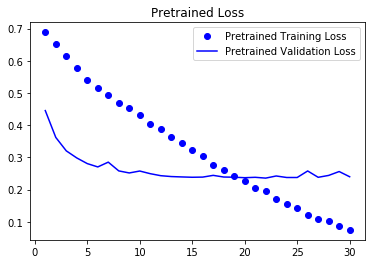

In [58]:
p_acc = pretrained_history.history['acc']
p_val_acc = pretrained_history.history['val_acc']
p_loss = pretrained_history.history['loss']
p_val_loss = pretrained_history.history['val_loss']

epochs = range(1, len(p_acc) + 1)

plt.plot(epochs, p_acc, 'bo', label='Pretrained Training Acc')
plt.plot(epochs, p_val_acc, 'b', label='Pretrained Validation Acc')
plt.title('Pretrained Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Pretrained Training Loss')
plt.plot(epochs, p_val_loss, 'b', label='Pretrained Validation Loss')
plt.title('Pretrained Loss')
plt.legend()

plt.show()

In [59]:
model = Sequential([
    conv_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [60]:
conv_base.trainable = False

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

final_history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

print('Training complete')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 152s 2s/step - loss: 0.5840 - acc: 0.7100 - val_loss: 0.4586 - val_acc: 0.8310
Epoch 2/30
100/100 [==============================] - 155s 2s/step - loss: 0.4684 - acc: 0.8010 - val_loss: 0.3415 - val_acc: 0.8520
Epoch 3/30
100/100 [==============================] - 155s 2s/step - loss: 0.4323 - acc: 0.8045 - val_loss: 0.4352 - val_acc: 0.8600
Epoch 4/30
100/100 [==============================] - 155s 2s/step - loss: 0.4063 - acc: 0.8170 - val_loss: 0.1673 - val_acc: 0.8770
Epoch 5/30
100/100 [==============================] - 155s 2s/step - loss: 0.3775 - acc: 0.8310 - val_loss: 0.1699 - val_acc: 0.8580
Epoch 6/30
100/100 [==============================] - 155s 2s/step - loss: 0.3703 - acc: 0.8340 - val_loss: 0.3286 - val_acc: 0.8850
Epoch 7/30
100/100 [==============================] - 155s 2s/step - loss: 0.3579 - acc: 0.8455 - val_loss: 0.2439 - v

In [ ]:
model.save('')

Using TensorFlow backend.


(1, 150, 150, 3)


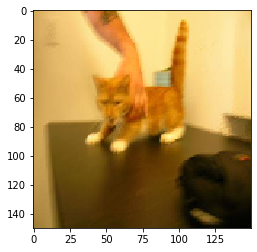

In [2]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

img_path = '/home/nick/Documents/Neural_Networks/Tutorials/Dogs_vs_Cats/small_data/training/cats/cat.0.jpg'

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

print(img_tensor.shape)

plt.imshow(img_tensor[0])
plt.show()

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras import models

test_dir = '/home/nick/Documents/Neural_Networks/Tutorials/Dogs_vs_Cats/small_data/test'
model = models.load_model('/home/nick/Documents/Neural_Networks/Tutorials/Dogs_vs_Cats/models/vgg16_feature_extraction.h5')

test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    class_mode='binary',
    target_size=(150, 150),
    batch_size=20)

test_loss, test_acc = model.evaluate(test_generator, steps=50)
print(test_acc)

/home/nick/anaconda3/lib/python3.7/site-packages/keras/engine/saving.py:384: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


Found 1000 images belonging to 2 classes.
50/50 [==============================] - 49s 982ms/step
0.8920000195503235


In [13]:
layer_outputs = [layer.get_output_at(-1) for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)

In [14]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 4, 4, 512)


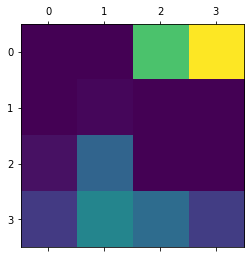

In [15]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

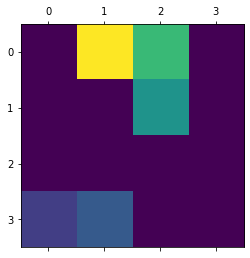

In [16]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')